# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for data visualization
import seaborn as sb #an improvement of matplotlib
import seaborn as sns #an improvement of matplotlib


# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Reading the file

In [2]:
df = pd.read_csv ('amazon_2024_valentines_best_sellers.csv')
df.head()

,title,brand,description,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price,price/currency,price/value,categoryPageData/productPosition
0,"Ferrero Rocher, 24 Count, Premium Milk Chocola...",Ferrero Rocher,Ferrero Rocher's milk chocolate gift box offer...,0.02,0.07,0.89,20021.0,NaN,$,11.39,7
1,"HERSHEY'S NUGGETS Assorted Chocolate, Valentin...",HERSHEY'S,This HERSHEY'S NUGGETS candy assortment is fil...,0.03,0.10,0.84,18891.0,NaN,$,10.69,16
2,LEGO Icons Flower Bouquet Building Decoration ...,LEGO,Giving and receiving beautiful flowers is such...,0.01,0.05,0.92,19395.0,NaN,$,47.99,2
3,BodyRefresh Shower Steamers Aromatherapy - 8 P...,BodyRefresh,NaN,0.07,0.15,0.67,593.0,NaN,$,9.99,10
4,JoJowell Shower Steamers Aromatherapy - 21Pcs ...,JoJowell,NaN,0.10,0.15,0.63,816.0,NaN,$,21.99,11


# Understanding the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   title                             218 non-null    object 
 1   brand                             217 non-null    object 
 2   description                       46 non-null     object 
 3   starsBreakdown/3star              218 non-null    float64
 4   starsBreakdown/4star              218 non-null    float64
 5   starsBreakdown/5star              218 non-null    float64
 6   reviewsCount                      216 non-null    float64
 7   price                             0 non-null      float64
 8   price/currency                    169 non-null    object 
 9   price/value                       169 non-null    float64
 10  categoryPageData/productPosition  218 non-null    int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 18.9+ KB


In [4]:
# see the number of rows and columns
df.shape

(218, 11)

In [5]:
# see the name of the columns
df.columns

Index(['title', 'brand', 'description', 'starsBreakdown/3star',
       'starsBreakdown/4star', 'starsBreakdown/5star', 'reviewsCount', 'price',
       'price/currency', 'price/value', 'categoryPageData/productPosition'],
      dtype='object')

In [6]:
# see a brief statistical decription on each column
df.describe()

,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price,price/value,categoryPageData/productPosition
count,218.000000,218.000000,218.000000,216.000000,0.0,169.000000,218.000000
mean,0.049220,0.105275,0.767936,2863.759259,NaN,18.046805,127.123853
std,0.041966,0.066756,0.151997,7104.953282,NaN,11.696470,91.812865
min,0.000000,0.000000,0.000000,1.000000,NaN,1.990000,1.000000
25%,0.030000,0.072500,0.720000,54.750000,NaN,9.990000,52.250000
50%,0.040000,0.100000,0.790000,387.500000,NaN,15.950000,103.500000
75%,0.070000,0.130000,0.850000,1581.500000,NaN,21.990000,193.750000
max,0.380000,0.490000,1.000000,54895.000000,NaN,79.950000,310.000000


In [7]:
# Duplicate Rows

df.duplicated().sum()

0

# Data Cleaning

In [8]:
# First lets find out total revenue

Total_revenue = df['price/value'].sum()

Total_revenue

3049.91

In [9]:
print(df.isnull().sum())

title                                 0
brand                                 1
description                         172
starsBreakdown/3star                  0
starsBreakdown/4star                  0
starsBreakdown/5star                  0
reviewsCount                          2
price                               218
price/currency                       49
price/value                          49
categoryPageData/productPosition      0
dtype: int64


In [10]:
# Dropping unnecessary columns

df = df.drop(['description', 'price', 'price/currency' ], axis=1)

df.head(2)

,title,brand,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price/value,categoryPageData/productPosition
0,"Ferrero Rocher, 24 Count, Premium Milk Chocola...",Ferrero Rocher,0.02,0.07,0.89,20021.0,11.39,7
1,"HERSHEY'S NUGGETS Assorted Chocolate, Valentin...",HERSHEY'S,0.03,0.10,0.84,18891.0,10.69,16


In [11]:
# replace each column of missing values with its respective mean

mean_review = df['reviewsCount'].mean()
mean_currency = df['price/value'].mean()

df['price/value'].fillna(mean_currency, inplace=True)

In [12]:
df.isnull().sum()

title                               0
brand                               1
starsBreakdown/3star                0
starsBreakdown/4star                0
starsBreakdown/5star                0
reviewsCount                        2
price/value                         0
categoryPageData/productPosition    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   title                             218 non-null    object 
 1   brand                             217 non-null    object 
 2   starsBreakdown/3star              218 non-null    float64
 3   starsBreakdown/4star              218 non-null    float64
 4   starsBreakdown/5star              218 non-null    float64
 5   reviewsCount                      216 non-null    float64
 6   price/value                       218 non-null    float64
 7   categoryPageData/productPosition  218 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.8+ KB


In [14]:
#drop brand row with missing data
df.dropna(subset=['brand'],axis=0, inplace=True)

In [15]:
df.isnull().sum()

title                               0
brand                               0
starsBreakdown/3star                0
starsBreakdown/4star                0
starsBreakdown/5star                0
reviewsCount                        2
price/value                         0
categoryPageData/productPosition    0
dtype: int64

# Explaratory Data Analysis

In [16]:
df.dtypes

title                                object
brand                                object
starsBreakdown/3star                float64
starsBreakdown/4star                float64
starsBreakdown/5star                float64
reviewsCount                        float64
price/value                         float64
categoryPageData/productPosition      int64
dtype: object

In [17]:
df.head()

,title,brand,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price/value,categoryPageData/productPosition
0,"Ferrero Rocher, 24 Count, Premium Milk Chocola...",Ferrero Rocher,0.02,0.07,0.89,20021.0,11.39,7
1,"HERSHEY'S NUGGETS Assorted Chocolate, Valentin...",HERSHEY'S,0.03,0.10,0.84,18891.0,10.69,16
2,LEGO Icons Flower Bouquet Building Decoration ...,LEGO,0.01,0.05,0.92,19395.0,47.99,2
3,BodyRefresh Shower Steamers Aromatherapy - 8 P...,BodyRefresh,0.07,0.15,0.67,593.0,9.99,10
4,JoJowell Shower Steamers Aromatherapy - 21Pcs ...,JoJowell,0.10,0.15,0.63,816.0,21.99,11


In [18]:
# Renaming Column headers
df = df.rename(columns={"title": "Product Name", "brand": "Brand Name", "reviewsCount": "Total Reviews", "starsBreakdown/3star":"3 Stars Breakdown", 
                       "starsBreakdown/4star": "4 Stars Breakdown", "starsBreakdown/5star": "5 Stars Breakdown", "price/value": "Price",
                       "categoryPageData/productPosition": "Product Position"})

In [19]:
df.columns

Index(['Product Name', 'Brand Name', '3 Stars Breakdown', '4 Stars Breakdown',
       '5 Stars Breakdown', 'Total Reviews', 'Price', 'Product Position'],
      dtype='object')

# Questions to be answered

## 1. Which products and brands have the best & worst reviews?

In [20]:
best_reviews_product = df.loc[df['Total Reviews'].idxmax(), 'Product Name']
worst_reviews_product = df.loc[df['Total Reviews'].idxmin(), 'Product Name']

best_reviews_brand = df.loc[df['Total Reviews'].idxmax(), 'Brand Name']
worst_reviews_brand = df.loc[df['Total Reviews'].idxmin(), 'Brand Name']

# Display Results
print("Products and Brands with the Best and Worst Reviews:")
print("\nBest Reviews Products:", best_reviews_product)
print("\nWorst Reviews Products:", worst_reviews_product)
print("\nBest Reviews Brand:", best_reviews_brand)
print("\nWorst Reviews Brand:", worst_reviews_brand)

Products and Brands with the Best and Worst Reviews:

Best Reviews Products: BAIMEI Jade Roller & Gua Sha, Face Roller Redness Reducing Skin Care Tools, Massager for Face, Eyes, Neck, Relieve Wrinkles, Self Care Gift for Men Women, Valentine's Day Gifts - Rose Quartz

Worst Reviews Products: 32pcs Valentines Day Gifts for Kids - Valentines with Mini Pop Fidget Toys Bulk - Valentine Exchange for Girls Boys Classroom

Best Reviews Brand: BAIMEI

Worst Reviews Brand: Jetrvat


## 2. What brands are on the best seller list most often?

In [21]:
# Brands on the best seller list most often
best_seller_brands=df['Brand Name'].value_counts().idxmax()

# Display Result
print("\nBrands on the Best Seller List Most Often:", best_seller_brands)


Brands on the Best Seller List Most Often: Ferrero Rocher


## 3. Are there any trends between prices and ratings?

In [22]:
# Trends between prices and ratings
Avg_rating_by_price = df.groupby(pd.cut(df['Price'], bins=5))['5 Stars Breakdown'].mean()

# Display Result
print("\nAverage Rating by Price:")
print(Avg_rating_by_price)


Average Rating by Price:
Price
(1.912, 17.582]     0.752500
(17.582, 33.174]    0.781887
(33.174, 48.766]    0.780000
(48.766, 64.358]    0.836667
(64.358, 79.95]     0.790000
Name: 5 Stars Breakdown, dtype: float64


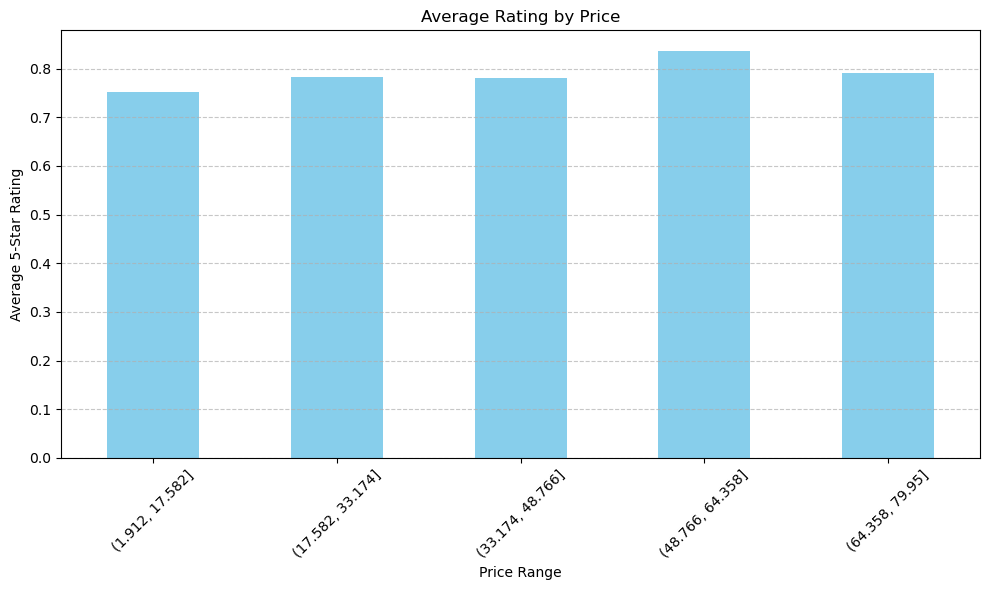

In [23]:
# Visualizations
# Plotting average rating by price
plt.figure(figsize=(10, 6))
Avg_rating_by_price.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Price')
plt.xlabel('Price Range')
plt.ylabel('Average 5-Star Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4. Which products are above average for 5-star ratings?

In [24]:
# Products above average for 5-star ratings
above_avg_5star = df[df['5 Stars Breakdown']>df['5 Stars Breakdown'].mean()]['Product Name']

# Display Result
print("\nProducts Above Average for 5-Star Ratings:")
print(above_avg_5star)


Products Above Average for 5-Star Ratings:
0      Ferrero Rocher, 24 Count, Premium Milk Chocola...
1      HERSHEY'S NUGGETS Assorted Chocolate, Valentin...
2      LEGO Icons Flower Bouquet Building Decoration ...
6      LEGO Cherry Blossoms Gift for Valentine's Day,...
9      JOYIN 24 PCS Valentine's Day Heart Stress Ball...
                             ...                        
209    LWBDD 13" Valentines Day Gift Bags 2 Pcs with ...
210    J'FLORU Valentine’s Day Gifts,6 Pack Valentine...
212    Cheerin Valentines Day Card with Envelope - Fu...
214    THEMEROL Natural Gemstone Bracelet Gifts for D...
217    Valentine's Day Gifts For Her - Rose in Glass ...
Name: Product Name, Length: 138, dtype: object


# 5. Reviewing top 10 brands basis total reviews 

In [33]:
# Step 1: Group by 'Brand'
grouped_df = df.groupby('Brand Name')
avg_prices = grouped_df['Price'].mean()
avg_scores = grouped_df['Total Reviews'].mean()

# Step 3: Sort the results based on average review score in descending order
sorted_brands = avg_scores.sort_values(ascending=False)
sorted_brands_perprice = avg_prices.sort_values(ascending=False)

# Step 4: Select the top brands
top_brands = sorted_brands.head(10)
top_brands_perprice = sorted_brands_perprice.head(10)

# Display the top brands and their average review scores
print(top_brands)
print(top_brands_perprice)

Brand Name
BAIMEI                  54895.000000
Burt's Bees             32945.000000
Bazooka Candy Brands    27866.000000
HOME SMILE              24615.000000
grace & stella          21545.000000
Skittles                19772.000000
Nut Cravings            19537.000000
Body Restore            16281.000000
Ferrero Rocher          15326.833333
LParkin                 11974.000000
Name: Total Reviews, dtype: float64
Brand Name
GLAMOUR BOUTIQUE      79.950
Lebana                65.990
SKPAND                62.660
DENIMOMO              49.990
Roseshy               49.490
Godiva Chocolatier    49.125
NEWNOVE               43.990
Dream of Flowers      42.990
YWHL                  37.990
TranquilBliss         29.990
Name: Price, dtype: float64


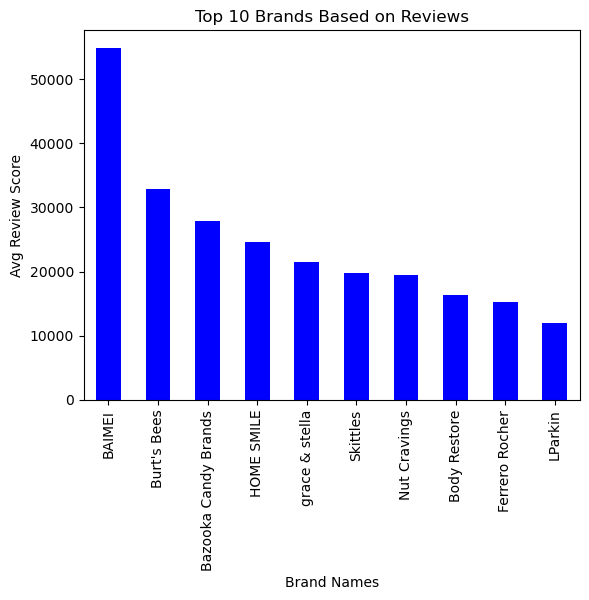

In [28]:
# Plotting the bar chart for top 10 brands
top_brands.plot(kind='bar', color='blue')

# Adding labels and title
plt.xlabel('Brand Names')
plt.ylabel('Avg Review Score')
plt.title('Top 10 Brands Based on Reviews')

# Display the plot
plt.show()

In [29]:
df.columns

Index(['Product Name', 'Brand Name', '3 Stars Breakdown', '4 Stars Breakdown',
       '5 Stars Breakdown', 'Total Reviews', 'Price', 'Product Position'],
      dtype='object')

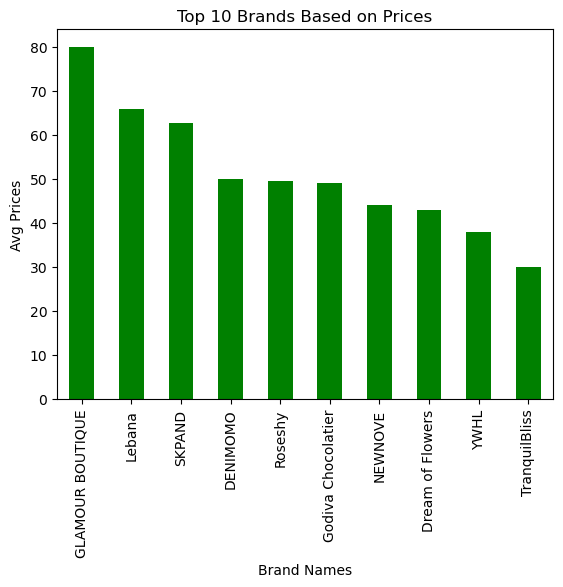

In [34]:
# Plotting the bar chart for top brands based on price
top_brands_perprice.plot(kind='bar', color='green')

# Adding labels and title
plt.xlabel('Brand Names')
plt.ylabel('Avg Prices')
plt.title('Top 10 Brands Based on Prices')

# Display the plot
plt.show()